<h2> Preparing the Data

<h3>Import Libraries

The following code is written in Python 3.7. Below is the list of libraries used.

In [1]:
#Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import itertools
import copy
import csv
import openpyxl

#ML
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Common Model Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

********************

<h3> Data Set Restructuring

In [2]:
# read BIXI data set
df = pd.read_csv('modified_dataset.csv')

In [3]:
df

,STARTSTATIONNAME,STARTSTATIONARRONDISSEMENT,STARTSTATIONLATITUDE,STARTSTATIONLONGITUDE,ENDSTATIONNAME,ENDSTATIONARRONDISSEMENT,ENDSTATIONLATITUDE,ENDSTATIONLONGITUDE,STARTTIMEMS,ENDTIMEMS,...,TRIPDURATION,STARTSTATIONLONGITUDE_log,ENDSTATIONLONGITUDE_log,STARTTIMEMS_log,ENDTIMEMS_log,avg_dew_point_log,TRIPDURATION_log,STARTSTATIONLATITUDE_sqrt,ENDSTATIONLATITUDE_sqrt,STARTTIMEDT
0,St-Urbain / René-Lévesque,Ville-Marie,45.507838,-73.563136,Mansfield / Ste-Catherine,Ville-Marie,45.501399,-73.571786,1653343831220,1.653344e+12,...,382.483,NaN,NaN,28.133821,28.133821,1.335001,5.949295,6.745950,6.745472,2022-05-23 22:10:31.220
1,Roy / St-Laurent,Le Plateau-Mont-Royal,45.515616,-73.575808,Dorion / Rachel,Le Plateau-Mont-Royal,45.531634,-73.568246,1653343831410,1.653345e+12,...,1137.948,NaN,NaN,28.133821,28.133822,1.335001,7.037860,6.746526,6.747713,2022-05-23 22:10:31.410
2,Lajeunesse / Villeray,Villeray - Saint-Michel - Parc-Extension,45.542119,-73.622547,Leman / de Chateaubriand,Villeray - Saint-Michel - Parc-Extension,45.547218,-73.631103,1653343832935,1.653344e+12,...,268.894,NaN,NaN,28.133821,28.133821,1.335001,5.598029,6.748490,6.748868,2022-05-23 22:10:32.935
3,Parc Plage,Ville-Marie,45.502828,-73.527793,de la Commune / King,Ville-Marie,45.497515,-73.552571,1653343837732,1.653347e+12,...,3360.184,NaN,NaN,28.133821,28.133823,1.335001,8.120049,6.745578,6.745185,2022-05-23 22:10:37.732
4,Marie-Anne / de la Roche,Le Plateau-Mont-Royal,45.527758,-73.576185,Métro Laurier (Bibaud / Rivard),Le Plateau-Mont-Royal,45.527839,-73.589575,1653343832286,1.653344e+12,...,308.446,NaN,NaN,28.133821,28.133821,1.335001,5.734784,6.747426,6.747432,2022-05-23 22:10:32.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8967922,St-Charles / Thomas-Keefer,Le Sud-Ouest,45.477605,-73.573775,de la Commune / St-Sulpice,Ville-Marie,45.504242,-73.553470,1661014205935,1.661016e+12,...,1829.385,NaN,NaN,28.138449,28.138451,2.809403,7.512282,6.743709,6.745683,2022-08-20 16:50:05.935
8967923,de Lanaudière / Laurier,Le Plateau-Mont-Royal,45.533314,-73.583737,Duluth / St-Laurent,Le Plateau-Mont-Royal,45.516876,-73.579460,1661014216698,1.661015e+12,...,1149.723,NaN,NaN,28.138450,28.138450,2.809403,7.048146,6.747838,6.746620,2022-08-20 16:50:16.698
8967924,de Bordeaux / Marie-Anne,Le Plateau-Mont-Royal,45.533409,-73.570657,Gauthier / Papineau,Le Plateau-Mont-Royal,45.529666,-73.567336,1661014214254,1.661014e+12,...,178.542,NaN,NaN,28.138450,28.138450,2.809403,5.190409,6.747845,6.747567,2022-08-20 16:50:14.254
8967925,Prince-Arthur / du Parc,Le Plateau-Mont-Royal,45.510590,-73.575470,Vallières / St-Laurent,Le Plateau-Mont-Royal,45.518967,-73.583616,1661014213535,1.661015e+12,...,312.281,NaN,NaN,28.138450,28.138450,2.809403,5.747101,6.746154,6.746775,2022-08-20 16:50:13.535


In [4]:
df.columns

Index(['STARTSTATIONNAME', 'STARTSTATIONARRONDISSEMENT',
       'STARTSTATIONLATITUDE', 'STARTSTATIONLONGITUDE', 'ENDSTATIONNAME',
       'ENDSTATIONARRONDISSEMENT', 'ENDSTATIONLATITUDE', 'ENDSTATIONLONGITUDE',
       'STARTTIMEMS', 'ENDTIMEMS', 'year', 'month', 'day', 'hour',
       'avg_temperature', 'avg_wind_speed', 'avg_dew_point', 'rain', 'snow',
       'snow_on_ground', 'TRIPDURATION', 'STARTSTATIONLONGITUDE_log',
       'ENDSTATIONLONGITUDE_log', 'STARTTIMEMS_log', 'ENDTIMEMS_log',
       'avg_dew_point_log', 'TRIPDURATION_log', 'STARTSTATIONLATITUDE_sqrt',
       'ENDSTATIONLATITUDE_sqrt', 'STARTTIMEDT'],
      dtype='object')

In [5]:
df.columns = df.columns.str.replace (' ', '_').str.lower()

In [6]:
# Select the required features and clean the column names
selected_features = ['starttimems', 'endtimems', 'avg_temperature', 'avg_wind_speed', 'rain', 'snow','tripduration']

In [7]:
data = df[selected_features]

In [8]:
data

,starttimems,endtimems,avg_temperature,avg_wind_speed,rain,snow,tripduration
0,1653343831220,1.653344e+12,11.3,11.5,0.0,0.0,382.483
1,1653343831410,1.653345e+12,11.3,11.5,0.0,0.0,1137.948
2,1653343832935,1.653344e+12,11.3,11.5,0.0,0.0,268.894
3,1653343837732,1.653347e+12,11.3,11.5,0.0,0.0,3360.184
4,1653343832286,1.653344e+12,11.3,11.5,0.0,0.0,308.446
...,...,...,...,...,...,...,...
8967922,1661014205935,1.661016e+12,24.2,8.5,0.0,0.0,1829.385
8967923,1661014216698,1.661015e+12,24.2,8.5,0.0,0.0,1149.723
8967924,1661014214254,1.661014e+12,24.2,8.5,0.0,0.0,178.542
8967925,1661014213535,1.661015e+12,24.2,8.5,0.0,0.0,312.281


<h3> Modifying the Data ('starttimems')

In [9]:
data.columns

Index(['starttimems', 'endtimems', 'avg_temperature', 'avg_wind_speed', 'rain',
       'snow', 'tripduration'],
      dtype='object')

In [10]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Convert 'starttimems' to datetime format
data['starttimems'] = pd.to_datetime(data['starttimems'], unit='ms')

# Create a new column 'hour' containing the hour extracted from 'starttimems'
data['hour'] = data['starttimems'].dt.hour

# Create a new column 'day' containing the day name extracted from 'starttimems'
data['day'] = data['starttimems'].dt.day_name()

C:\Users\AHAD\AppData\Local\Temp\ipykernel_20688\1606601306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['starttimems'] = pd.to_datetime(data['starttimems'], unit='ms')
C:\Users\AHAD\AppData\Local\Temp\ipykernel_20688\1606601306.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data['starttimems'].dt.hour
C:\Users\AHAD\AppData\Local\Temp\ipykernel_20688\1606601306.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [11]:
# Assuming 'data' is your DataFrame
data['day_indicator'] = data['day'].apply(lambda x: 0 if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 1)

C:\Users\AHAD\AppData\Local\Temp\ipykernel_20688\2140492867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_indicator'] = data['day'].apply(lambda x: 0 if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 1)


In [12]:
# Assuming 'data' is your DataFrame
# Drop the 'day' column
data = data.drop('day', axis=1)

In [13]:
data

,starttimems,endtimems,avg_temperature,avg_wind_speed,rain,snow,tripduration,hour,day_indicator
0,2022-05-23 22:10:31.220,1.653344e+12,11.3,11.5,0.0,0.0,382.483,22,0
1,2022-05-23 22:10:31.410,1.653345e+12,11.3,11.5,0.0,0.0,1137.948,22,0
2,2022-05-23 22:10:32.935,1.653344e+12,11.3,11.5,0.0,0.0,268.894,22,0
3,2022-05-23 22:10:37.732,1.653347e+12,11.3,11.5,0.0,0.0,3360.184,22,0
4,2022-05-23 22:10:32.286,1.653344e+12,11.3,11.5,0.0,0.0,308.446,22,0
...,...,...,...,...,...,...,...,...,...
8967922,2022-08-20 16:50:05.935,1.661016e+12,24.2,8.5,0.0,0.0,1829.385,16,1
8967923,2022-08-20 16:50:16.698,1.661015e+12,24.2,8.5,0.0,0.0,1149.723,16,1
8967924,2022-08-20 16:50:14.254,1.661014e+12,24.2,8.5,0.0,0.0,178.542,16,1
8967925,2022-08-20 16:50:13.535,1.661015e+12,24.2,8.5,0.0,0.0,312.281,16,1


In [14]:
# Select the required features and clean the column names
selected_features = ['day_indicator', 'avg_temperature', 'avg_wind_speed','tripduration']

In [15]:
data = data[selected_features]

In [16]:
data

,day_indicator,avg_temperature,avg_wind_speed,tripduration
0,0,11.3,11.5,382.483
1,0,11.3,11.5,1137.948
2,0,11.3,11.5,268.894
3,0,11.3,11.5,3360.184
4,0,11.3,11.5,308.446
...,...,...,...,...
8967922,1,24.2,8.5,1829.385
8967923,1,24.2,8.5,1149.723
8967924,1,24.2,8.5,178.542
8967925,1,24.2,8.5,312.281


In [17]:
import pandas as pd

# Assuming 'data' is your DataFrame
nan_count_per_column = data.isna().sum()

# Display the number of NaN values in each column
print("Number of NaN values in each column:")
print(nan_count_per_column)


Number of NaN values in each column:
day_indicator          0
avg_temperature        0
avg_wind_speed         0
tripduration       40523
dtype: int64


In [18]:
# Assuming 'data' is your DataFrame
data = data.dropna()

# Display the cleaned DataFrame
print("DataFrame after removing rows with NaN values:")
print(data)


DataFrame after removing rows with NaN values:
         day_indicator  avg_temperature  avg_wind_speed  tripduration
0                    0             11.3            11.5       382.483
1                    0             11.3            11.5      1137.948
2                    0             11.3            11.5       268.894
3                    0             11.3            11.5      3360.184
4                    0             11.3            11.5       308.446
...                ...              ...             ...           ...
8967922              1             24.2             8.5      1829.385
8967923              1             24.2             8.5      1149.723
8967924              1             24.2             8.5       178.542
8967925              1             24.2             8.5       312.281
8967926              1             24.2             8.5       498.504

[8927404 rows x 4 columns]


In [19]:
# Assuming 'data' is your DataFrame
data.dropna(inplace=True)

# Display the modified DataFrame
print("Original DataFrame after removing rows with NaN values:")
print(data)


Original DataFrame after removing rows with NaN values:
         day_indicator  avg_temperature  avg_wind_speed  tripduration
0                    0             11.3            11.5       382.483
1                    0             11.3            11.5      1137.948
2                    0             11.3            11.5       268.894
3                    0             11.3            11.5      3360.184
4                    0             11.3            11.5       308.446
...                ...              ...             ...           ...
8967922              1             24.2             8.5      1829.385
8967923              1             24.2             8.5      1149.723
8967924              1             24.2             8.5       178.542
8967925              1             24.2             8.5       312.281
8967926              1             24.2             8.5       498.504

[8927404 rows x 4 columns]


C:\Users\AHAD\AppData\Local\Temp\ipykernel_20688\2710968936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [20]:
import numpy as np

# Assuming 'data_cleaned' is your DataFrame with no NaN values
data['tripduration_log'] = np.log1p(data['tripduration'])

# Drop the original 'tripduration' column if you want
data.drop('tripduration', axis=1, inplace=True)

# Display the DataFrame with the new 'tripduration_log' column
print(data)


C:\Users\AHAD\AppData\Local\Temp\ipykernel_20688\3952614661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tripduration_log'] = np.log1p(data['tripduration'])


         day_indicator  avg_temperature  avg_wind_speed  tripduration_log
0                    0             11.3            11.5          5.949295
1                    0             11.3            11.5          7.037860
2                    0             11.3            11.5          5.598029
3                    0             11.3            11.5          8.120049
4                    0             11.3            11.5          5.734784
...                ...              ...             ...               ...
8967922              1             24.2             8.5          7.512282
8967923              1             24.2             8.5          7.048146
8967924              1             24.2             8.5          5.190409
8967925              1             24.2             8.5          5.747101
8967926              1             24.2             8.5          6.213616

[8927404 rows x 4 columns]


C:\Users\AHAD\AppData\Local\Temp\ipykernel_20688\3952614661.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('tripduration', axis=1, inplace=True)


In [21]:
data

,day_indicator,avg_temperature,avg_wind_speed,tripduration_log
0,0,11.3,11.5,5.949295
1,0,11.3,11.5,7.037860
2,0,11.3,11.5,5.598029
3,0,11.3,11.5,8.120049
4,0,11.3,11.5,5.734784
...,...,...,...,...
8967922,1,24.2,8.5,7.512282
8967923,1,24.2,8.5,7.048146
8967924,1,24.2,8.5,5.190409
8967925,1,24.2,8.5,5.747101


*****

In [22]:
features = data[['day_indicator', 'avg_temperature', 'avg_wind_speed']]
target = data['tripduration_log']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [25]:
# Evaluate the model
r2 = r2_score(y_test, predictions)

In [26]:
print(f'R-squared: {r2}')

R-squared: 0.007699551774651758


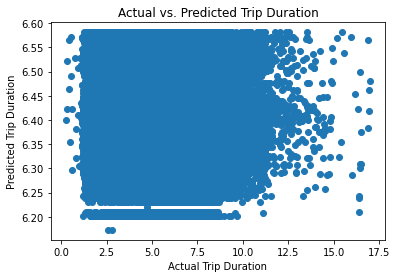

In [27]:
# Visualize actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Trip Duration')
plt.ylabel('Predicted Trip Duration')
plt.title('Actual vs. Predicted Trip Duration')
plt.show()

In [28]:
features = data[['day_indicator', 'avg_temperature', 'avg_wind_speed']]
target = data['tripduration_log']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [30]:
# Initialize the linear regression model
model = LinearRegression()

In [31]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Create a DataFrame with predicted trip durations, temperatures, and actual trip durations
predicted_data = pd.DataFrame({'Predicted_Trip_Duration': np.expm1(predictions), 'Temperature': X_test['avg_temperature'], 'Actual_Trip_Duration': np.expm1(y_test)})

# Print the DataFrame
print(predicted_data)

         Predicted_Trip_Duration  Temperature  Actual_Trip_Duration
489091                713.037195        24.70              2483.733
8937428               597.404009        18.60              1572.752
2501735               690.613237        22.20               281.478
7941005               696.919200        22.35               326.462
6752050               611.828402        20.85               449.382
...                          ...          ...                   ...
6229002               680.637727        19.95               428.252
4589074               682.651956        20.25               495.998
7015548               618.131606        10.40              1359.575
3981477               540.121253         7.94               261.504
3410054               597.028830        18.25              1462.601

[1785481 rows x 3 columns]


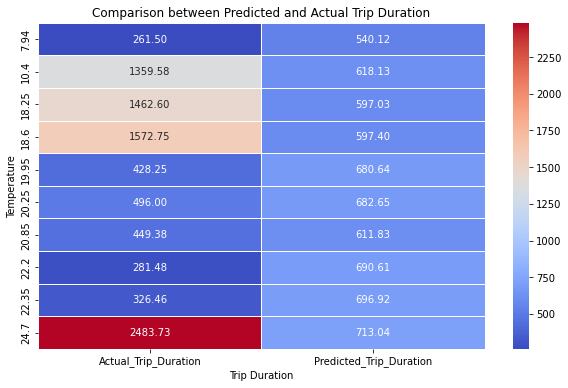

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your data
data = {
    'Predicted_Trip_Duration': [713.037195, 597.404009, 690.613237, 696.919200, 611.828402, 680.637727, 682.651956, 618.131606, 540.121253, 597.028830],
    'Temperature': [24.70, 18.60, 22.20, 22.35, 20.85, 19.95, 20.25, 10.40, 7.94, 18.25],
    'Actual_Trip_Duration': [2483.733, 1572.752, 281.478, 326.462, 449.382, 428.252, 495.998, 1359.575, 261.504, 1462.601]
}

df = pd.DataFrame(data)

# Create a pivot table
heatmap_data = df.pivot_table(values=['Predicted_Trip_Duration', 'Actual_Trip_Duration'], index='Temperature')

# Plot annotated heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Comparison between Predicted and Actual Trip Duration')
plt.xlabel('Trip Duration')
plt.ylabel('Temperature')
plt.show()


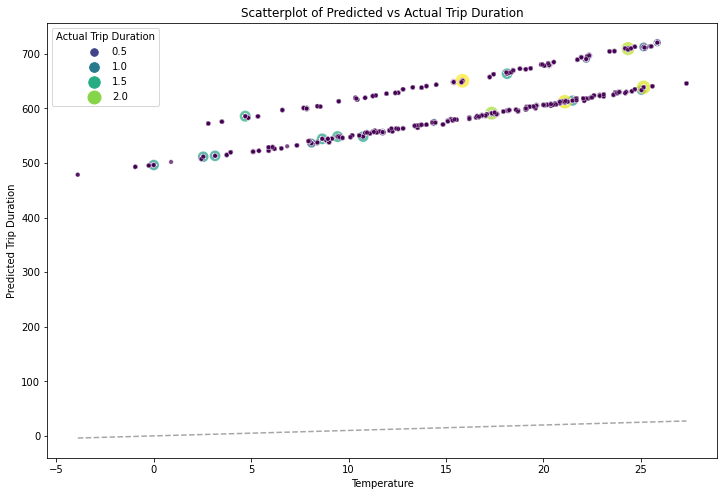

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'predicted_data' is your DataFrame
# with columns: Predicted_Trip_Duration, Temperature, Actual_Trip_Duration

# Scatterplot with multiple semantics
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Temperature', y='Predicted_Trip_Duration', hue='Actual_Trip_Duration', size='Actual_Trip_Duration', data=predicted_data, palette='viridis', sizes=(20, 200), alpha=0.7)

# Adding a diagonal line for reference (perfect prediction)
plt.plot([predicted_data['Temperature'].min(), predicted_data['Temperature'].max()],
         [predicted_data['Temperature'].min(), predicted_data['Temperature'].max()],
         linestyle='--', color='gray', alpha=0.7)

plt.title('Scatterplot of Predicted vs Actual Trip Duration')
plt.xlabel('Temperature')
plt.ylabel('Predicted Trip Duration')
plt.legend(title='Actual Trip Duration')
plt.show()
